In [1]:
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib as Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
filepath=(r"C:\Users\Weesam\Documents\School\UOFT Work\Project 2-Group-1\sample5.csv")

# Read in the CSV as a DataFrame
laundering_data=pd.read_csv(filepath)
laundering_data

,Unnamed: 0.1,Unnamed: 0,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,67687,2244693,2022/09/04 18:45,220,80FD4ABB0,45701,811953270,2316.73,Shekel,2316.73,Shekel,Cheque,0
1,236093,28714,2022/09/01 00:26,6129,803783EA0,6129,803783EA0,4.65,US Dollar,4.65,US Dollar,Reinvestment,0
2,158830,2298029,2022/09/05 00:11,217959,80BB7AAF0,221279,81163FEF0,26.15,Euro,26.15,Euro,Credit Card,0
3,308599,1370981,2022/09/02 07:41,24963,804886150,29435,80E6F68A0,1366.01,Euro,1366.01,Euro,Credit Card,0
4,362950,4289605,2022/09/09 02:02,14011,801EA7120,13516,805581330,7442.38,Euro,7442.38,Euro,Cheque,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10152,468589,3014910,2022/09/06 11:43,12,80C67D8B0,33727,80C7ECAA0,31394.07,Mexican Peso,31394.07,Mexican Peso,Credit Card,0
10153,480524,2686374,2022/09/05 19:38,18196,8031438B0,131928,80FF6AAD0,623.39,Yuan,623.39,Yuan,Cash,0
10154,169099,4196356,2022/09/08 23:06,1068,800F07400,1068,801A91CF0,14379.35,US Dollar,14379.35,US Dollar,Cheque,0
10155,238976,972523,2022/09/01 19:48,1024,8068B8B00,16450,809802750,182314.26,Euro,182314.26,Euro,Cheque,0


In [3]:
laundering_data.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [4]:
laundering_data

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/04 18:45,220,80FD4ABB0,45701,811953270,2316.73,Shekel,2316.73,Shekel,Cheque,0
1,2022/09/01 00:26,6129,803783EA0,6129,803783EA0,4.65,US Dollar,4.65,US Dollar,Reinvestment,0
2,2022/09/05 00:11,217959,80BB7AAF0,221279,81163FEF0,26.15,Euro,26.15,Euro,Credit Card,0
3,2022/09/02 07:41,24963,804886150,29435,80E6F68A0,1366.01,Euro,1366.01,Euro,Credit Card,0
4,2022/09/09 02:02,14011,801EA7120,13516,805581330,7442.38,Euro,7442.38,Euro,Cheque,0
...,...,...,...,...,...,...,...,...,...,...,...
10152,2022/09/06 11:43,12,80C67D8B0,33727,80C7ECAA0,31394.07,Mexican Peso,31394.07,Mexican Peso,Credit Card,0
10153,2022/09/05 19:38,18196,8031438B0,131928,80FF6AAD0,623.39,Yuan,623.39,Yuan,Cash,0
10154,2022/09/08 23:06,1068,800F07400,1068,801A91CF0,14379.35,US Dollar,14379.35,US Dollar,Cheque,0
10155,2022/09/01 19:48,1024,8068B8B00,16450,809802750,182314.26,Euro,182314.26,Euro,Cheque,0


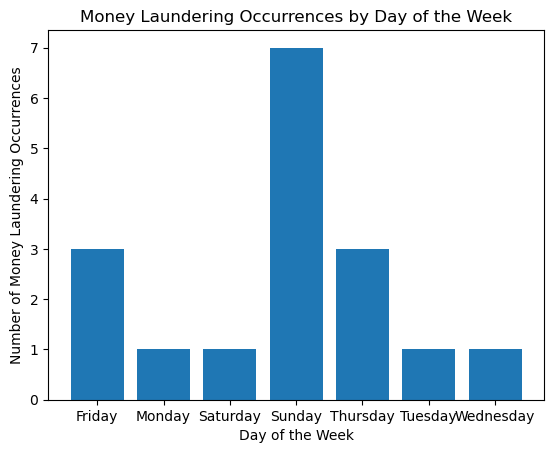

In [23]:
laundering_data['Timestamp'] = pd.to_datetime(laundering_data['Timestamp'])
laundering_data['Day_of_Week'] = laundering_data['Timestamp'].dt.day_name()


day_of_week_counts = laundering_data[laundering_data['Is Laundering'] == 1].groupby('Day_of_Week').size()


plt.bar(day_of_week_counts.index, day_of_week_counts)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Money Laundering Occurrences')
plt.title('Money Laundering Occurrences by Day of the Week')
plt.show()